# Coursera Project

## -- Project to prodict car accident severity


### Introduction


For the final capstone project in the IBM certificate course, we want to analyze the accident "severity" in terms of human fatality, traffic delay, property damage, or any other type of accident bad impact. The data was collected by Seattle SPOT Traffic Management Division and provided by Coursera via a link. This dataset is updated weekly and is from 2004 to present. It contains information such as severity code, address type, location, collision type, weather, road condition, speeding, among others. 

[This is the link to Seattle Traffic Management Division](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf)


The target audiences of this study are those people who really care about the traffic records, especially in the transportation department. Also, we want to figure out the reason for collisions and help to reduce accidents in the future. 


### Data


There are 194,673 observations and 38 variables in this data set. Since we would like to identify the factors that cause the accident and the level of severity, we will use SEVERITYCODE as our dependent variable Y, and try different combinations of independent variables X to get the result. Since the observations are quite large, we may need to filter out the missing value and delete the unrelated columns first. Then we can select the factor which may have more impact on the accidents, such as address type, weather, road condition, and light condition. 

The target Data to be predicted under (SEVERITYCODE 1-prop damage 2-injury) label.


Other important variables include:
* ADDRTYPE: Collision address type: Alley, Block, Intersection
* LOCATION: Description of the general location of the collision 
* PERSONCOUNT: The total number of people involved in the collision helps identify severity involved
* PEDCOUNT: The number of pedestrians involved in the collision helps identify severity involved
* PEDCYLCOUNT: The number of bicycles involved in the collision helps identify severity involved
* VEHCOUNT: The number of vehicles involved in the collision identify severity involved
* JUNCTIONTYPE: Category of junction at which collision took place helps identify where most collisions occur
* WEATHER: A description of the weather conditions during the time of the collision 
* ROADCOND: The condition of the road during the collision 
* LIGHTCOND: The light conditions during the collision
* SPEEDING: Whether or not speeding was a factor in the collision (Y/N) 
* SEGLANEKEY: A key for the lane segment in which the collision occurred
* CROSSWALKKEY: A key for the crosswalk at which the collision occurred
* HITPARKEDCAR: Whether or not the collision involved hitting a parked car


In [1]:
# import general libraries
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings # Suppress warnings because they are annoying
warnings.filterwarnings('ignore')

In [2]:
# imput the dataset
traffic = pd.read_csv("Data-Collisions.csv")
traffic.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
# there are 194,673 observations and 38 columns in the dataset
traffic.shape

(194673, 38)

In [4]:
# we want to filter out the variables which are useful for this study
data=traffic[['SEVERITYCODE','X','Y','LOCATION','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND']]
data.head(10)

,SEVERITYCODE,X,Y,LOCATION,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,2,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,3,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,3,Clear,Dry,Daylight
4,2,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,2,Raining,Wet,Daylight
5,1,-122.387598,47.690575,24TH AVE NW AND NW 85TH ST,2,Clear,Dry,Daylight
6,1,-122.338485,47.618534,DENNY WAY AND WESTLAKE AVE,2,Raining,Wet,Daylight
7,2,-122.320780,47.614076,BROADWAY AND E PIKE ST,1,Clear,Dry,Daylight
8,1,-122.335930,47.611904,PINE ST BETWEEN 5TH AVE AND 6TH AVE,2,Clear,Dry,Daylight
9,2,-122.384700,47.528475,41ST AVE SW AND SW THISTLE ST,2,Clear,Dry,Daylight


In [5]:
# clean the data, delete the missing values
data.dropna(inplace = True)
data.shape

(184167, 8)

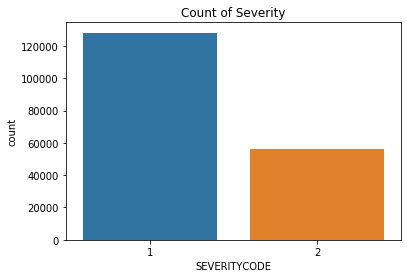

In [6]:
# let's generate a bar chart to see the see the count of different level of severities
# looks like there is around 135,000 level 1 cases and 60,000 level 2 cases
ax=sns.countplot('SEVERITYCODE',data=data,order=data['SEVERITYCODE'].value_counts().index)
ax.set_title('Count of Severity')
plt.show()

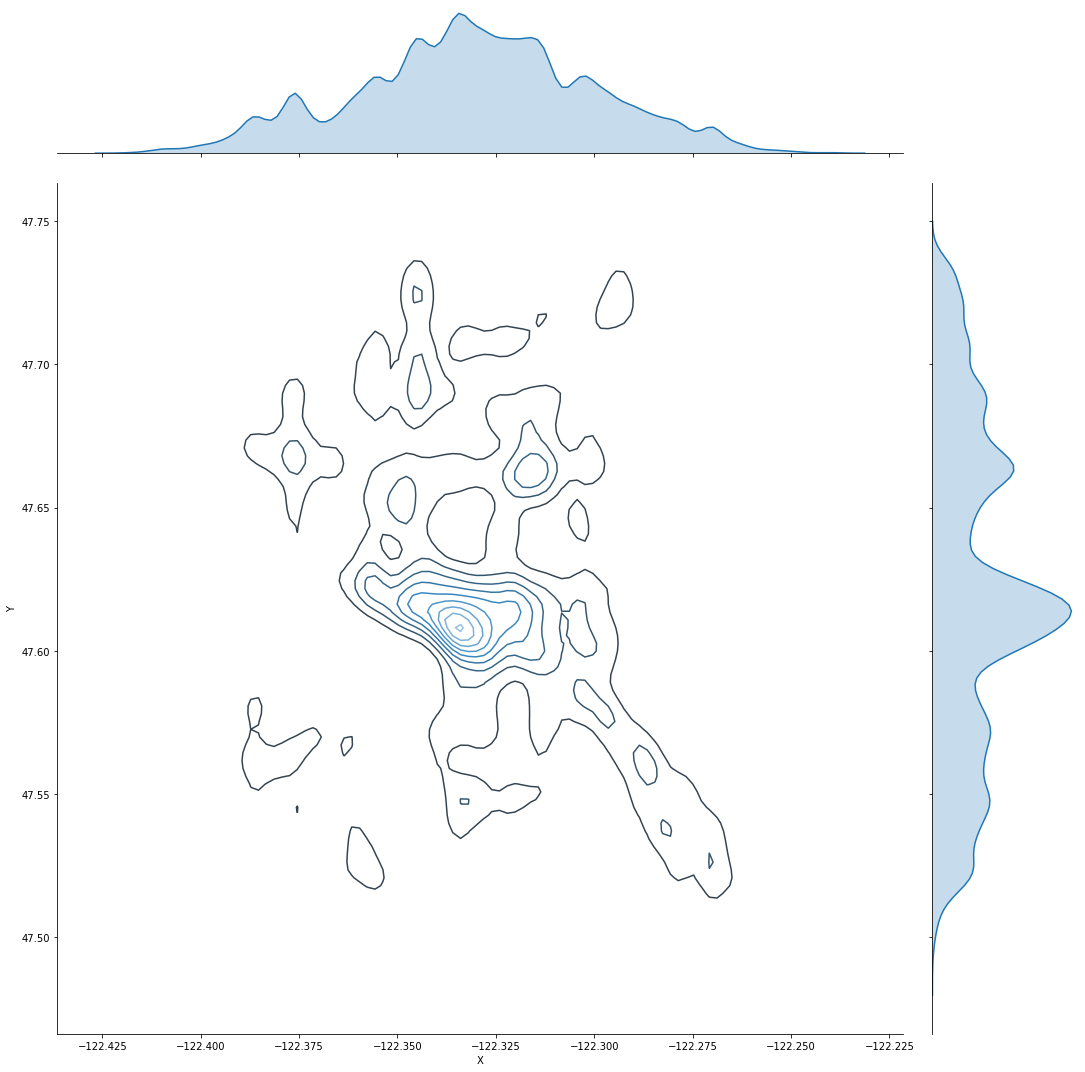

In [7]:
# let's generate a joint plot to see where the accident are more likely to happen
#sns.jointplot(x=data.X,y=data.Y,height=10)
#plt.show()
g2 = sns.JointGrid(x=data.X, y=data.Y, height=15)
g2 = g2.plot_joint(sns.kdeplot, cmap="Blues_d")
g2 = g2.plot_marginals(sns.kdeplot, shade=True)

In [8]:
# from the graph above, we can same some places do have more accidents than the others
# so we will count the value based on the address (location)
addinfo=data['LOCATION'].value_counts().to_frame()
addinfo.head(10)

,LOCATION
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,260
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,246
6TH AVE AND JAMES ST,241
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,235
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,229
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,208
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,182
1ST AVE BETWEEN BLANCHARD ST AND BELL ST,159
5TH AVE AND SPRING ST,154
RAINIER AVE S BETWEEN S HENDERSON ST AND S DIRECTOR N ST,150


In [9]:
# it seems that weather may not be the main reason for the accidents 
# because both good and bad weather will cause the accidents
# but it may be useful to identify the severity level
data['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,108833
Raining,31987
Overcast,27105
Unknown,13846
Snowing,888
Other,765
Fog/Smog/Smoke,553
Sleet/Hail/Freezing Rain,112
Blowing Sand/Dirt,49
Severe Crosswind,24


In [10]:
# check with the clear weather condition to see the amount of accidents based on different severity level
weather_clear=data.loc[data['WEATHER']=='Clear']
weather_clear['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,73563
2,35270


In [11]:
# check with the raining weather condition to see the amount of accidents based on different severity level
weather_rain=data.loc[data['WEATHER']=='Raining']
weather_rain['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,21131
2,10856


In [12]:
# same for the road condition, it may not be the main reason that cause the accidents
# but it may be useful to identify the severity level too
data['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,121871
Wet,46009
Unknown,13795
Ice,1174
Snow/Slush,984
Other,116
Standing Water,102
Sand/Mud/Dirt,63
Oil,53


In [13]:
# we may use the light condition to identify the severity level too
data['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,113522
Dark - Street Lights On,47250
Unknown,12416
Dusk,5763
Dawn,2422
Dark - No Street Lights,1450
Dark - Street Lights Off,1145
Other,188
Dark - Unknown Lighting,11


In [14]:
# check with the good light condition to see the amount of accidents based on different severity level
dark_withlight=data.loc[data['LIGHTCOND']=='Dark - Street Lights On']
dark_withlight['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,33081
2,14169


In [15]:
# check with the bad light condition to see the amount of accidents based on different severity level
dark_nolight=data.loc[(data['LIGHTCOND']=='Dark - No Street Lights')|
                      (data['LIGHTCOND']=='Dark - Street Lights Off')]
dark_nolight['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,1970
2,625


In [16]:
# check which place may need to improve the light conditions
dark_nolight['LOCATION'].value_counts().to_frame().head(10)

,LOCATION
1ST AVE S BETWEEN SW KENYON ST AND S CLOVERDALE W ST,12
LAKE WASHINGTON BLVD E BETWEEN BOYER AVE E AND E FOSTER ISLAND RD,11
ALASKAN WY VI SB BETWEEN ALASKAN WY VI SB EFR OFF RP AND S HOLGATE ST,7
ALASKAN WY VI SB BETWEEN S LANDER ST AND ALASKAN WY VI SB WSB WB OFF RP,6
1ST AVE S BETWEEN S CLOVERDALE W ST AND 1ST AVS OFF S RP,5
LAKE WASHINGTON BLVD S BETWEEN 53RD AVE S AND S ALASKA ST,4
LAKE WASHINGTON BLVD S BETWEEN S HORTON NR ST AND S HORTON ST,4
ALASKAN WY VI NB BETWEEN S HOLGATE ST AND SR99 REPUBLICAN OFF RP,4
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,4
25TH AVE NE AND NE BLAKELEY ST,4


In [17]:
# check with the top 3 accident locations to see if the light condition will have impact on them
top1places=data.loc[(data['LOCATION']=='N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N')|
                    (data['LOCATION']=='AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST')|
                    (data['LOCATION']=='6TH AVE AND JAMES ST')]
top1places['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,497
Dark - Street Lights On,196
Dusk,31
Dawn,11
Unknown,11
Dark - Street Lights Off,1


In [18]:
# check if the weather will have impact on them
top1places['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,448
Raining,141
Overcast,138
Unknown,12
Snowing,6
Fog/Smog/Smoke,2


In [19]:
# since we have't find out the good indicator to idenfity the severity level
# I add more one more variable in my filter dataset - 'VEHCOUNT' to see if it works
# we choose the accidents with 6+ vehicles, we figure out that nealy 50% of them are severity 2
sixvehs=data.loc[data['VEHCOUNT']>=6]
sixvehs['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,124
2,93


In [20]:
# also, it seems that more accidents with 6+ vehicles are happen with dark condition
sixvehs['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Dark - Street Lights On,107
Daylight,86
Dawn,8
Dark - Street Lights Off,6
Dark - No Street Lights,4
Dusk,4
Unknown,2


### Conclusion


This project and analysis are quite helpful for the Seattle transportation department. Before I did the analysis, I thought that maybe weather, road, and light condition may cause more accidents, the results showed that it was not correct. However, we do figure out that the accidents are highly related to some specific locations. Thus, the traffic management division could try to improve the safety instructions or some other factors that could reduce the accidents. 


Furthermore, there are some places which has more accidents during the dark time. For those places, adding lights might be a good solution to reduce the collisions.  Also, when more cars involved in the accident, it seems that the level of severity will increase. They may need to be responded immediately to save more life. 


### Thank you